# Bernstein-Vazirani Algorithm

<h3>What is Bernstein-Vazirani Algorithm?</h3>

The Bernstein-Vazirani algorithm deals with finding a hidden integer $s \in \{0,1\}^n$ from an oracle $f_s$ that returns a bit $s \cdot x \equiv \sum_i s_i x_i \mod 2$ upon receiving an input $x \in \{0,1\}^n$. A classical oracle returns $f_s(x) = s \cdot x \mod 2$ given an input $x$. Meanwhile, a quantum oracle behaves similarly but can be queried with superposition of input $x$'s. 

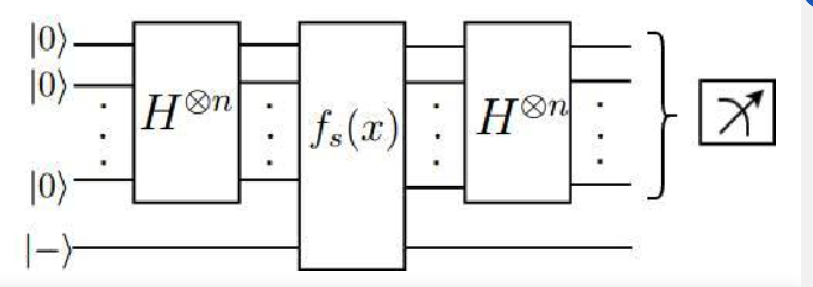

<h2>Steps</h2>

1. Initialize state.
2. Create superposition using Handamard gates.
3. Apply the function.
4. Perform Handamard transform.
5. Measure to obtain hidden string s.

# Implementation of Bernstein-Vazirani Algorithm

<h3>Set up the Environment</h3>

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute,BasicAer
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from qiskit.circuit import Gate

<h3>Build the Quantum Circuit</h3>

In [2]:
# Define the function
def function(qc, qr, s):
    nQubits = len(qr)
    
    for i in range(nQubits):
        if s & (1 << i):
            qc.z(qr[i])
        else:
            qc.id(qr[i])


In [3]:
# Inputs
nQubits = 5 # number of physical qubits
s = 0b11   #hidden string

# make sure that a can be represented with nQubits
s = s % 2**(nQubits)

<h4>Step 1: Initialize state.</h4>

In [4]:
# Creating registers
# qubits for querying the oracle and finding the hidden integer
qr = QuantumRegister(nQubits)
# for recording the measurement on qr
cr = ClassicalRegister(nQubits)

qc = QuantumCircuit(qr,cr)
qc.draw('mpl', style='iqp')  
qc.barrier()

<h4>Step 2: Create superposition using Handamard gates.</h4>

In [5]:
# Apply Hadamard gates before querying the oracle
for i in range(nQubits):
    qc.h(qr[i])
qc.barrier()

<h4>Step 3: Apply the function.</h4>

In [6]:
# Apply the function
function(qc, qr, s)

qc.barrier()

<h4>Step 4: Perform Handamard transform.</h4>

In [7]:
for i in range(nQubits):
    qc.h(qr[i])
qc.barrier()

<h4>Step 5: Measure to obtain hidden string s.</h4>

In [8]:
# Measurement
qc.measure(qr, cr)

# The quantum circuit for the Bernstein-Vazirani Algorithm

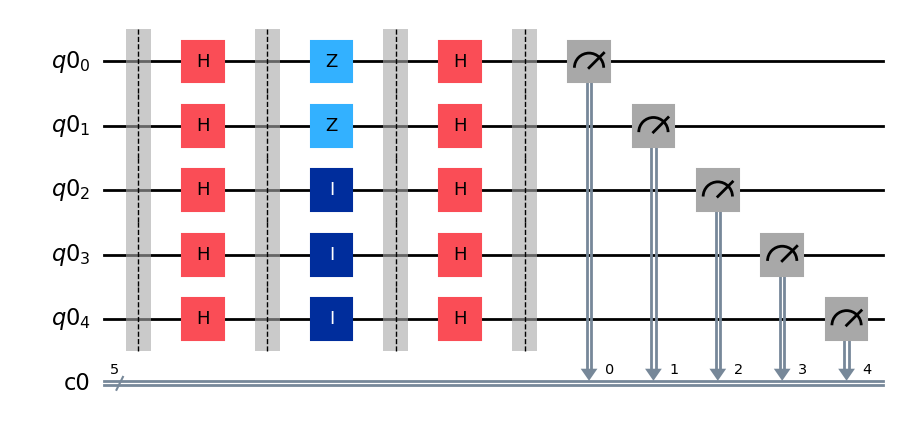

In [9]:
qc.draw('mpl', style='iqp')

In [10]:
# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()

# Get the counts of measurement outcomes
counts = result.get_counts(qc)
print(counts)

{'00011': 1024}


We indeed see that the outcome is the s

<h4>Conclusion</h4>

The Bernstein-Vazirani algorithm has several significant applications across various fields. In cryptography, it can be used to break symmetric-key cryptography by quickly discovering the secret key, thus exposing vulnerabilities in the encryption method. In machine learning, the algorithm aids in determining the optimal weights of a neural network, thereby enhancing the model's accuracy. For error correction, it efficiently identifies errors in data strings, streamlining the correction process. Additionally, the algorithm plays a role in quantum teleportation, where it encodes the state of a qubit into a classical bit string, facilitating the teleportation process. 